**Nota: Se ha identificado un error en el archivo "fming", por lo que se adjunta la versión corregida en un archivo .zip dentro de la tarea.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

import scipy.io
from sklearn import metrics


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

%pwd
%cd "/content/drive/MyDrive/Colab Notebooks/Aprendizaje Computacional/TallerDos"
%pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Aprendizaje Computacional/TallerDos


'/content/drive/MyDrive/Colab Notebooks/Aprendizaje Computacional/TallerDos'

In [ ]:
from RandParametros import randParametros
from fming import fmincg
from organizarBeta import organizarBeta
from sigmoid import sigmoid
from sigmoidGradiente import sigmoidGradiente

In [ ]:
mat = scipy.io.loadmat('datos4.mat')
x_data = mat['X']; #5000 X 400
y_data = mat['y']; #5000 X 1
#print(x_data[0,:])

[10]


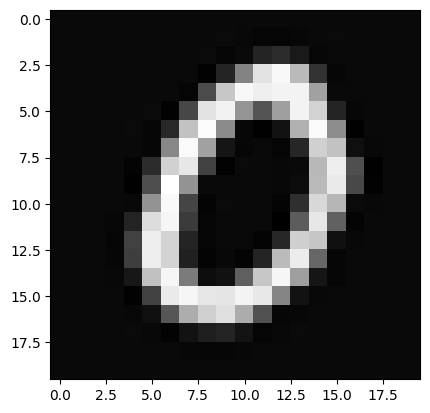

In [ ]:
cont = 0
DatSetImage = np.zeros((20,20))
ImageNumber = 300

for i in range(20):
  for j in range(20):
    DatSetImage[j,i] = x_data[ImageNumber,cont]
    cont+=1

plt.imshow(DatSetImage,cmap='gray')
print(y_data[ImageNumber])

In [ ]:
#Dividir datos en Entrenamiento en 70% y 30%
x_data_30 = np.zeros((0, x_data.shape[1]))
y_data_30 = np.zeros((0, y_data.shape[1]))

x_data_70 = np.zeros((0, x_data.shape[1]))
y_data_70 = np.zeros((0, y_data.shape[1]))

for i in range(0, x_data.shape[0], 500):
    x_data_30 = np.vstack((x_data_30, x_data[i:i+int(0.3*500), :]))
    x_data_70 = np.vstack((x_data_70, x_data[i+int(0.3*500):i+500, :]))

for i in range(0, y_data.shape[0], 500):
    y_data_30 = np.vstack((y_data_30, y_data[i:i+int(0.3*500), :]))
    y_data_70 = np.vstack((y_data_70, y_data[i+int(0.3*500):i+500, :]))

In [ ]:
Beta1_grad = 0
Beta2_grad = 0

tamano_capa_entrada  = 400
tamano_capa_media = 25
num_salidas =  10

In [ ]:
Beta1_inicial = randParametros(tamano_capa_entrada,tamano_capa_media);
Beta2_inicial = randParametros(tamano_capa_media, num_salidas);
parametros_Beta_Iniciales = np.concatenate((Beta1_inicial, Beta2_inicial),axis=None)
#print(parametros_Beta_Iniciales)
parametros_Beta_Iniciales = np.reshape(parametros_Beta_Iniciales,(parametros_Beta_Iniciales.shape[0],))
#print(parametros_Beta_Iniciales)

In [ ]:
[Beta1,Beta2] = organizarBeta(tamano_capa_media,tamano_capa_entrada,num_salidas,parametros_Beta_Iniciales)

In [ ]:
#Esta celda debe ser finalizada
def nnFunction1(nn_params,tamano_capa_entrada,tamano_capa_media,num_salidas, x, y, Lambda, m):

    [Beta1,Beta2] = organizarBeta(tamano_capa_media,tamano_capa_entrada,num_salidas,nn_params)

    # Inicializar acumuladores de gradientes
    Beta1_grad = np.zeros_like(Beta1)
    Beta2_grad = np.zeros_like(Beta2)

    acum1 = np.zeros_like(Beta1.T) #401x25
    acum2 = np.zeros_like(Beta2.T) #26x10

    J = 0

    for t in range(m):
        #Propagacion hacia adelante
        x1 = x[t,:] #(400,)
        a1 = np.concatenate((np.array([1]), x1))  #(401,)
        z2 = np.dot(Beta1, a1)
        a2 = np.concatenate((np.array([1]), sigmoid(z2)))  # Añadir el término de sesgo, 1 X (tamano_capa_media + 1)
        z3 = np.dot(Beta2, a2)
        a3 = sigmoid(z3)

        #Paso intermedio
        y_vector = np.zeros(num_salidas)
        pos = y[t]
        if(pos == 10):
          pos = 0

        if(type(pos) == np.ndarray):
          y_vector[int(pos[0])] = 1
        else:
          y_vector[(pos)] = 1

        #Propagacion hacia atras
        delta3 = a3 - y_vector  # Calcular el error en la capa de salida
        delta2 = np.multiply(np.dot(Beta2[:,1:].T, delta3),sigmoidGradiente(z2))

        #Acumuladores
        a1 = a1.reshape(-1, 1)
        acum1 += a1 * delta2

        a2 = a2.reshape(-1, 1)
        acum2 += a2 * delta3

        #Funcion cost(J) parte 1
        A = np.sum((np.multiply(y_vector, np.log(a3))) + ((np.multiply((1- y_vector), np.log(1 - a3)))))
        J = J + A

    #Funcion cost(J) parte 2
    sum1 = np.sum(np.sum(Beta1[:, 1:]**2))
    sum2 = np.sum(np.sum(Beta2[:, 1:]**2))

    J = ((-1/m) * J) + (Lambda / (2 * m)) * (sum1 + sum2)

    #Calculamos gradientes
    Temp_Beta1 = np.copy(Beta1)
    Temp_Beta1[:,0] = 0
    Beta1_grad = (1/m) * (acum1.T + Lambda * Temp_Beta1)

    Temp_Beta2 = np.copy(Beta2)
    Temp_Beta2[:,0] = 0
    Beta2_grad = (1/m) * (acum2.T + Lambda * Temp_Beta2)

    grad = np.concatenate((Beta1_grad,Beta2_grad),axis=None)

    grad = np.concatenate((Beta1_grad.flatten(), Beta2_grad.flatten()))
    retornar = [J, grad]
    return retornar

In [ ]:
#Celda de prueba

Lambda = 1
m = len(x_data_70)
retornar = nnFunction1(parametros_Beta_Iniciales, tamano_capa_entrada, tamano_capa_media, num_salidas, x_data_70, y_data_70, Lambda, m)
print(retornar[0])

7.0682665833621545


In [ ]:
m = len(x_data_70)  # o m = len(y_data_30) si tienen la misma longitud
print("Valor de m:", m)
def costFuncition(p):
    ret = nnFunction1(p, tamano_capa_entrada, tamano_capa_media, num_salidas, x_data_70, y_data_70, Lambda, m)
    return ret

Valor de m: 3500


In [ ]:
options = {'maxiter' : 50}
Lambda = 0.1
parametros_Beta_Finales = fmincg(costFuncition,parametros_Beta_Iniciales,options)

Iteration 1 | Cost: 3.267423 
Iteration 2 | Cost: 3.233737 
Iteration 3 | Cost: 3.185173 
Iteration 4 | Cost: 2.612650 
Iteration 5 | Cost: 2.367303 
Iteration 6 | Cost: 2.070470 
Iteration 7 | Cost: 1.904078 
Iteration 8 | Cost: 1.707861 
Iteration 9 | Cost: 1.554582 
Iteration 10 | Cost: 1.415586 
Iteration 11 | Cost: 1.292855 
Iteration 12 | Cost: 1.145158 
Iteration 13 | Cost: 1.079830 
Iteration 14 | Cost: 0.994128 
Iteration 15 | Cost: 0.935474 
Iteration 16 | Cost: 0.901461 
Iteration 17 | Cost: 0.856089 
Iteration 18 | Cost: 0.838191 
Iteration 19 | Cost: 0.828556 
Iteration 20 | Cost: 0.795381 
Iteration 21 | Cost: 0.778053 
Iteration 22 | Cost: 0.757618 
Iteration 23 | Cost: 0.689677 
Iteration 24 | Cost: 0.631099 
Iteration 25 | Cost: 0.581055 
Iteration 26 | Cost: 0.551076 
Iteration 27 | Cost: 0.533244 
Iteration 28 | Cost: 0.526183 
Iteration 29 | Cost: 0.500346 
Iteration 30 | Cost: 0.490672 
Iteration 31 | Cost: 0.473157 
Iteration 32 | Cost: 0.456337 
Iteration 33 | Co

In [ ]:
[Beta1,Beta2] = organizarBeta(tamano_capa_media,tamano_capa_entrada,num_salidas,parametros_Beta_Finales)
#print(len(parametros_Beta_Finales))
#print(Beta2)

In [ ]:
#Cálcular Matriz de Confusión con el 30% de los datos

# Después de la corrección del problema con el índice t en el bucle

m = len(x_data_30)
# Calcular las predicciones para el conjunto de datos de prueba (30%)
conf_matrix = np.zeros((num_salidas, num_salidas), dtype=int)  # Lista para almacenar las predicciones
for t in range(m):  # Iterar sobre los datos de prueba
    # Propagación hacia adelante
    x1 = x_data_30[t,:]  # Asegúrate de que el índice t sea válido para x_data_30
    a1 = np.concatenate((np.array([1]), x1))
    z2 = np.dot(Beta1, a1.T)
    a2 = np.concatenate((np.array([1]), sigmoid(z2)))

    z3 = np.dot(Beta2, a2)
    a3 = sigmoid(z3)

    # Obtener la clase predicha y la clase real
    predicted_class = int(np.argmax(a3))
    pos = y_data_30[t]
    if(pos == 10):
        pos = 0

    true_class = int(pos)

    # Almacenar la clase real y la clase predicha
    conf_matrix[predicted_class, true_class] += 1

# print("Matriz de Confusión:")
# print(conf_matrix)


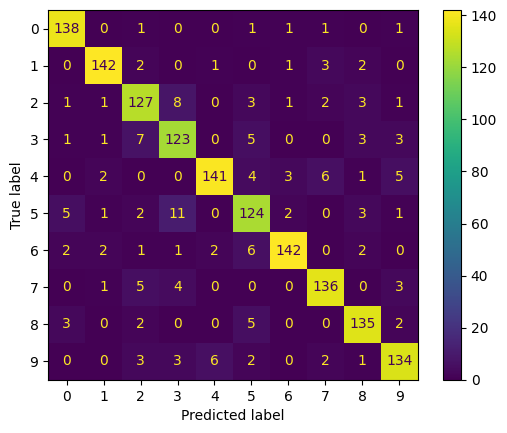

In [ ]:
# Visualizar la matriz de confusión
cm_display = metrics.ConfusionMatrixDisplay(conf_matrix)
cm_display.plot()
plt.show()

5. Siguiendo como ejemplo el código de la figura 1, escriba las líneas de código
que utilizaría para representar el modelo de la red neuronal implementada en el
punto 1.1., en términos de funciones de la librería Keras de TensorFlow (1
punto)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2984 - accuracy: 0.9139 - val_loss: 0.1402 - val_accuracy: 0.9565
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1411 - accuracy: 0.9579 - val_loss: 0.1098 - val_accuracy: 0.9673
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1067 - accuracy: 0.9671 - val_loss: 0.0836 - val_accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0876 - accuracy: 0.9727 - val_loss: 0.0804 - val_accuracy: 0.9748
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.9769
Pérdida en el conjunto de prueba: 0.0784275233745575
Precisión en el conjunto de prueba: 0.9768999814987183
313/313 [==============================] - 1s 2ms/step


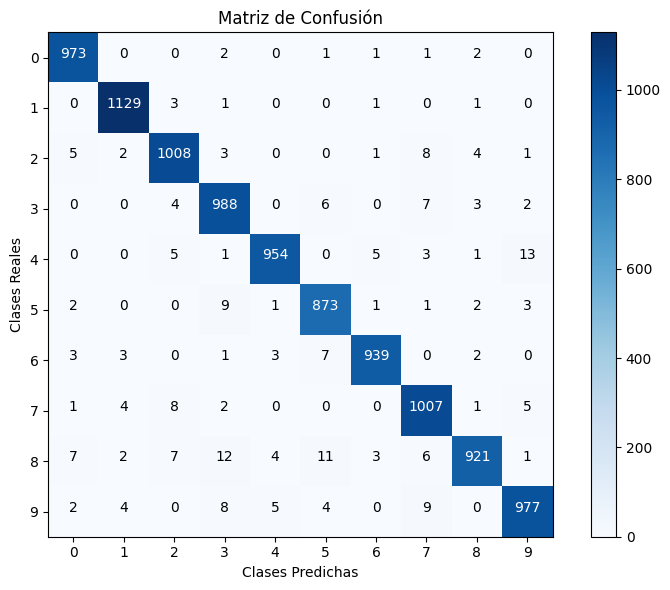

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Importar el conjunto de datos MNIST
mnist = tf.keras.datasets.mnist
(x_data_70, y_data_70), (x_data_30, y_data_30) = mnist.load_data()

# Normalizar los datos
x_data_70, x_data_30 = x_data_70 / 255.0, x_data_30 / 255.0

# Definir el modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo y guardar el historial
history = model.fit(x_data_70, y_data_70, epochs=5, validation_data=(x_data_30, y_data_30))

# Evaluar el modelo
loss, accuracy = model.evaluate(x_data_30, y_data_30)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

# Realizar predicciones
y_pred = np.argmax(model.predict(x_data_30), axis=-1)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_data_30, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Clases Predichas')
plt.ylabel('Clases Reales')
plt.tight_layout()
for i, j in ((i,j) for i in range(10) for j in range(10)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')
plt.show()